In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import datetime as dt
import seaborn as sb

In [2]:
df = pd.read_csv("../Nguyen/data/raw/dataset2/rawDataset2.csv")

In [3]:
df.head()

,car_name,year,selling_price,kms_driven,fuel_type,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7359 entries, 0 to 7358
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   car_name       7359 non-null   object
 1   year           7359 non-null   int64 
 2   selling_price  7359 non-null   int64 
 3   kms_driven     7359 non-null   int64 
 4   fuel_type      7359 non-null   object
 5   seller_type    7359 non-null   object
 6   transmission   7359 non-null   object
 7   owner          7359 non-null   object
 8   mileage        7359 non-null   object
 9   engine         7359 non-null   object
 10  max_power      7359 non-null   object
 11  torque         7359 non-null   object
 12  seats          7359 non-null   int64 
dtypes: int64(4), object(9)
memory usage: 747.5+ KB


In [5]:
df.drop(columns=["car_name"], inplace=True)
df['cars_years_old'] = dt.date.today().year - df.year
df.drop(columns="year", inplace=True)

In [6]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
selling_price,7359.0,NaN,NaN,NaN,649017.549531,808226.605059,29999.0,270000.0,450000.0,693000.0,10000000.0
kms_driven,7359.0,NaN,NaN,NaN,69197.184808,57138.386952,1.0,35000.0,60000.0,96000.0,2360457.0
fuel_type,7359,4,Diesel,4011,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_type,7359,3,Individual,6112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission,7359,2,Manual,6384,NaN,NaN,NaN,NaN,NaN,NaN,NaN
owner,7359,5,First Owner,4852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage,7359,390,18.9 kmpl,210,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engine,7359,121,1248 CC,965,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max_power,7359,315,74 bhp,362,NaN,NaN,NaN,NaN,NaN,NaN,NaN
torque,7359,438,190Nm@ 2000rpm,498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.isnull().sum()

selling_price     0
kms_driven        0
fuel_type         0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
torque            0
seats             0
cars_years_old    0
dtype: int64

In [8]:
df['mileage']

0        23.4 kmpl
1       21.14 kmpl
2        17.7 kmpl
3        23.0 kmpl
4        16.1 kmpl
           ...    
7354    22.54 kmpl
7355     18.5 kmpl
7356     16.8 kmpl
7357     19.3 kmpl
7358    23.57 kmpl
Name: mileage, Length: 7359, dtype: object

In [9]:
df['mileage'] = df['mileage'].str.extract('(\d+)').astype(float)
df['mileage']

0       23.0
1       21.0
2       17.0
3       23.0
4       16.0
        ... 
7354    22.0
7355    18.0
7356    16.0
7357    19.0
7358    23.0
Name: mileage, Length: 7359, dtype: float64

In [10]:
df['engine'] = df['engine'].str.extract('(\d+)').astype(float)
df['max_power'] = df['max_power'].str.extract('(\d+)').astype(float)
df['engine']

0       1248.0
1       1498.0
2       1497.0
3       1396.0
4       1298.0
         ...  
7354    1396.0
7355    1197.0
7356    1493.0
7357    1248.0
7358    1396.0
Name: engine, Length: 7359, dtype: float64

In [11]:
df['max_power']

0        74.0
1       103.0
2        78.0
3        90.0
4        88.0
        ...  
7354     88.0
7355     82.0
7356    110.0
7357     73.0
7358     70.0
Name: max_power, Length: 7359, dtype: float64

In [12]:
df['torque'] = df['torque'].str.extract('(\d+)').astype(float)
df['torque']

0       190.0
1       250.0
2        12.0
3        22.0
4        11.0
        ...  
7354    219.0
7355    113.0
7356     24.0
7357    190.0
7358    140.0
Name: torque, Length: 7359, dtype: float64

In [13]:
df.head()

,selling_price,kms_driven,fuel_type,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,cars_years_old
0,450000,145500,Diesel,Individual,Manual,First Owner,23.0,1248.0,74.0,190.0,5,8
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.0,1498.0,103.0,250.0,5,8
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.0,1497.0,78.0,12.0,5,16
3,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90.0,22.0,5,12
4,130000,120000,Petrol,Individual,Manual,First Owner,16.0,1298.0,88.0,11.0,5,15


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7359 entries, 0 to 7358
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   selling_price   7359 non-null   int64  
 1   kms_driven      7359 non-null   int64  
 2   fuel_type       7359 non-null   object 
 3   seller_type     7359 non-null   object 
 4   transmission    7359 non-null   object 
 5   owner           7359 non-null   object 
 6   mileage         7359 non-null   float64
 7   engine          7359 non-null   float64
 8   max_power       7359 non-null   float64
 9   torque          7359 non-null   float64
 10  seats           7359 non-null   int64  
 11  cars_years_old  7359 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 690.0+ KB


In [15]:
df.fuel_type = pd.Categorical(df.fuel_type)
df = df.assign(fuel_type_code=df.fuel_type.cat.codes)
df.seller_type = pd.Categorical(df.seller_type)
df = df.assign(seller_type_code=df.seller_type.cat.codes)
df.transmission = pd.Categorical(df.transmission)
df = df.assign(transmission_code=df.transmission.cat.codes)
df.owner = pd.Categorical(df.owner)
df = df.assign(owner_code=df.owner.cat.codes)
df

,selling_price,kms_driven,fuel_type,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,cars_years_old,fuel_type_code,seller_type_code,transmission_code,owner_code
0,450000,145500,Diesel,Individual,Manual,First Owner,23.0,1248.0,74.0,190.0,5,8,1,1,1,0
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.0,1498.0,103.0,250.0,5,8,1,1,1,2
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.0,1497.0,78.0,12.0,5,16,3,1,1,4
3,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90.0,22.0,5,12,1,1,1,0
4,130000,120000,Petrol,Individual,Manual,First Owner,16.0,1298.0,88.0,11.0,5,15,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7354,475000,80000,Diesel,Individual,Manual,Second Owner,22.0,1396.0,88.0,219.0,5,8,1,1,1,2
7355,320000,110000,Petrol,Individual,Manual,First Owner,18.0,1197.0,82.0,113.0,5,9,3,1,1,0
7356,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.0,1493.0,110.0,24.0,5,15,1,1,1,1
7357,382000,120000,Diesel,Individual,Manual,First Owner,19.0,1248.0,73.0,190.0,5,13,1,1,1,0


C:\Users\htien\AppData\Local\Temp\ipykernel_868\942198276.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr(), annot=True)


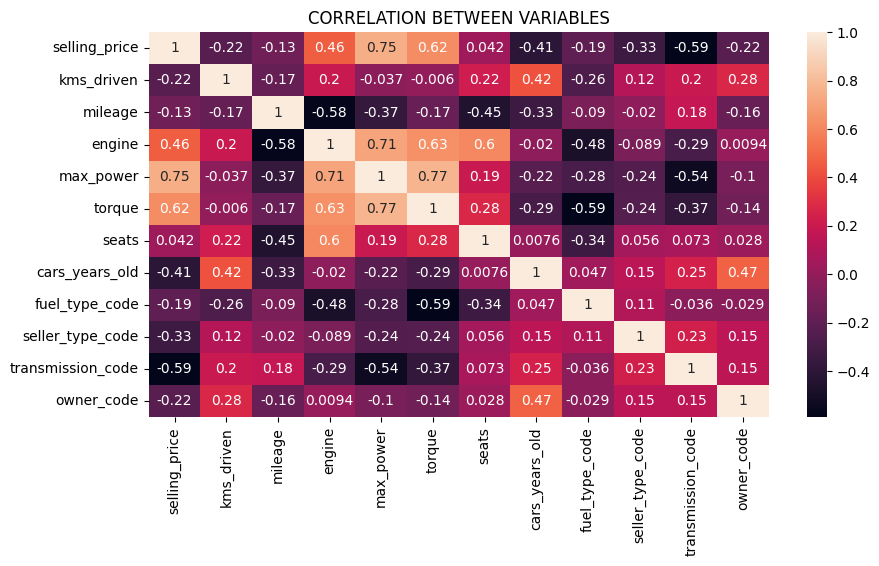

In [16]:
plt.figure(figsize=(10, 5))
sb.heatmap(df.corr(), annot=True)
plt.title("CORRELATION BETWEEN VARIABLES")
plt.show()

Insights:
Here we see that almost every variables have quite impact on selling price, except seats. However, there is some correlation between seats and other variables like engine, mileage, fuel_type.
Correlation between other variables is also quite high. This could lead to not very accurate result in LR.

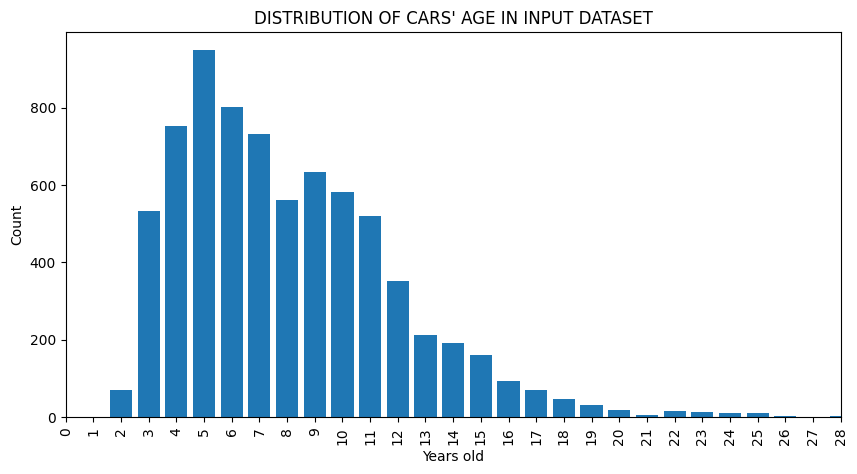

In [17]:
values = []
levels = df['cars_years_old'].unique()
for level in levels:
    values.append(df['cars_years_old'].loc[df['cars_years_old'] == level].count())
fig, ax = plt.subplots(figsize=(10, 5))
plt.bar(levels, values)
plt.xticks(rotation=90)
plt.xlabel("Years old")
plt.ylabel("Count")
plt.xlim(0, max(levels))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.title("DISTRIBUTION OF CARS' AGE IN INPUT DATASET")
plt.show()

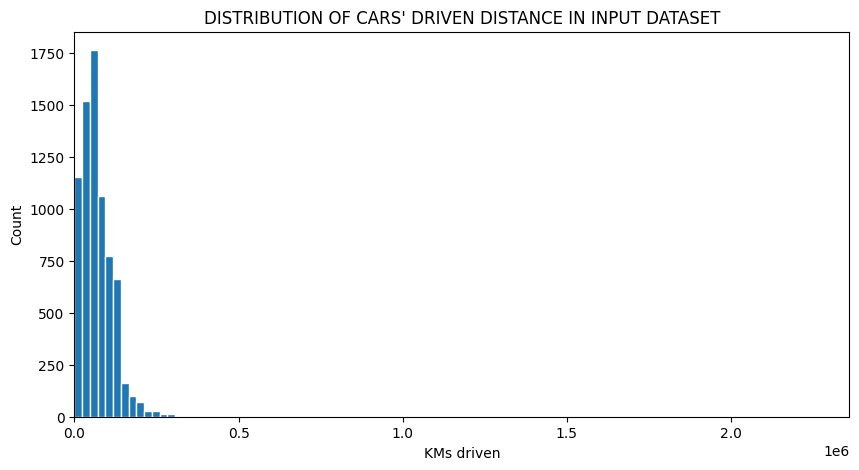

In [18]:
plt.figure(figsize=(10, 5))
bin_number = 100
plt.hist(df.kms_driven, bins=bin_number, edgecolor="white")
plt.xlabel("KMs driven")
plt.xlim(0, max(df.kms_driven))
plt.ylabel("Count")
plt.title("DISTRIBUTION OF CARS' DRIVEN DISTANCE IN INPUT DATASET")
plt.show()

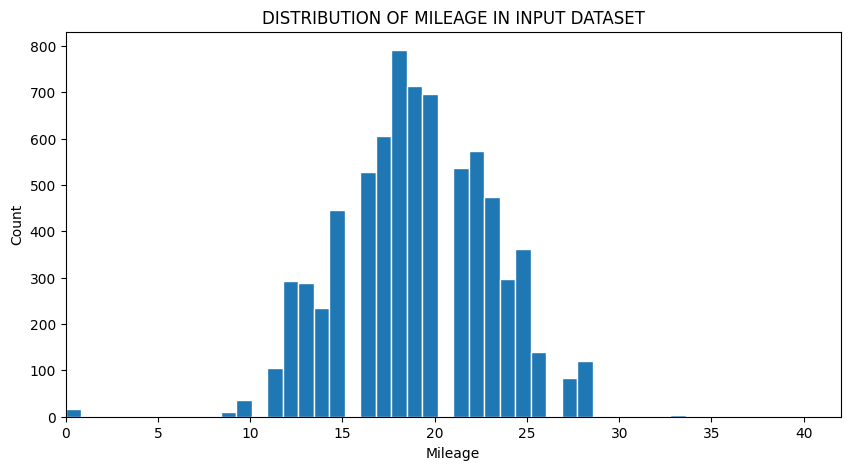

In [21]:
plt.figure(figsize=(10, 5))
bin_number = 50
plt.hist(df.mileage, bins=bin_number, edgecolor="white")
plt.xlabel("Mileage")
plt.xlim(0, max(df.mileage))
plt.ylabel("Count")
plt.title("DISTRIBUTION OF MILEAGE IN INPUT DATASET")
plt.show()

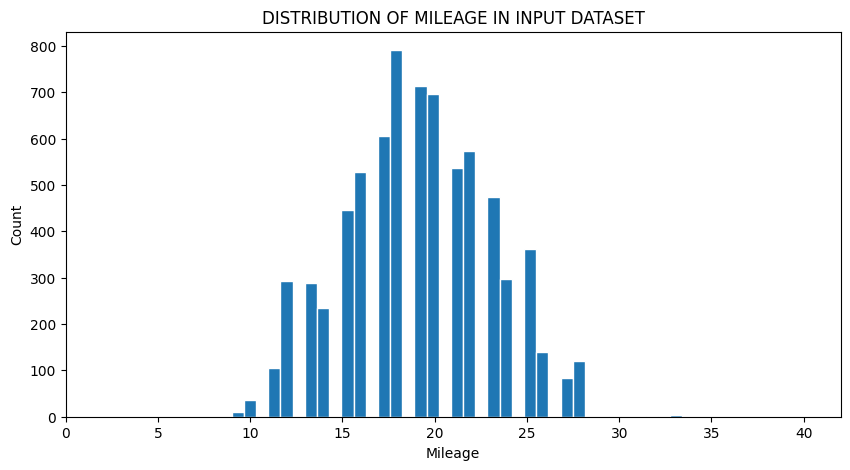

In [22]:
for x in df.index:
    if df.loc[x, "mileage"] < 5:
        df.drop(x, inplace=True)
plt.figure(figsize=(10, 5))
bin_number = 50
plt.hist(df.mileage, bins=bin_number, edgecolor="white")
plt.xlabel("Mileage")
plt.xlim(0, max(df.mileage))
plt.ylabel("Count")
plt.title("DISTRIBUTION OF MILEAGE IN INPUT DATASET")
plt.show()

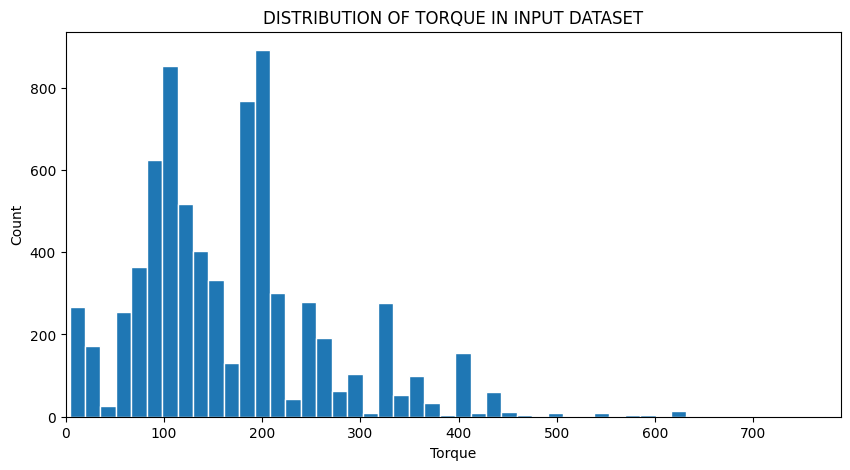

In [23]:
plt.figure(figsize=(10, 5))
bin_number = 50
plt.hist(df.torque, bins=bin_number, edgecolor="white")
plt.xlabel("Torque")
plt.xlim(0, max(df.torque))
plt.ylabel("Count")
plt.title("DISTRIBUTION OF TORQUE IN INPUT DATASET")
plt.show()

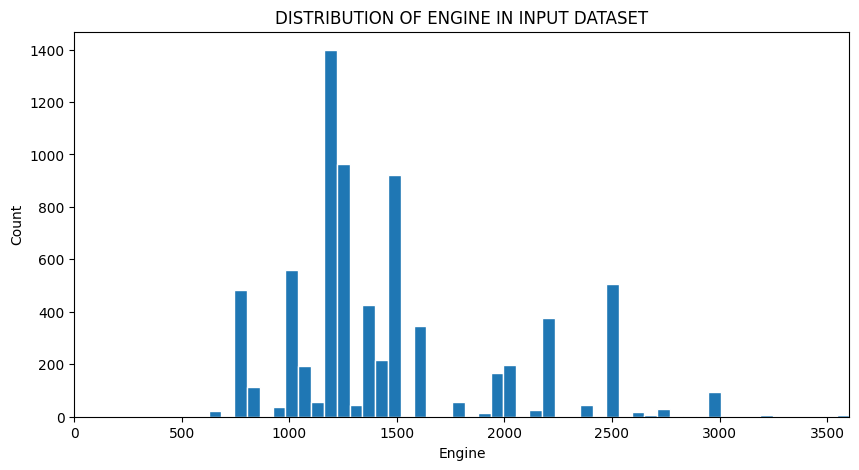

In [24]:
plt.figure(figsize=(10, 5))
bin_number = 50
plt.hist(df.engine, bins=bin_number, edgecolor="white")
plt.xlabel("Engine")
plt.xlim(0, max(df.engine))
plt.ylabel("Count")
plt.title("DISTRIBUTION OF ENGINE IN INPUT DATASET")
plt.show()

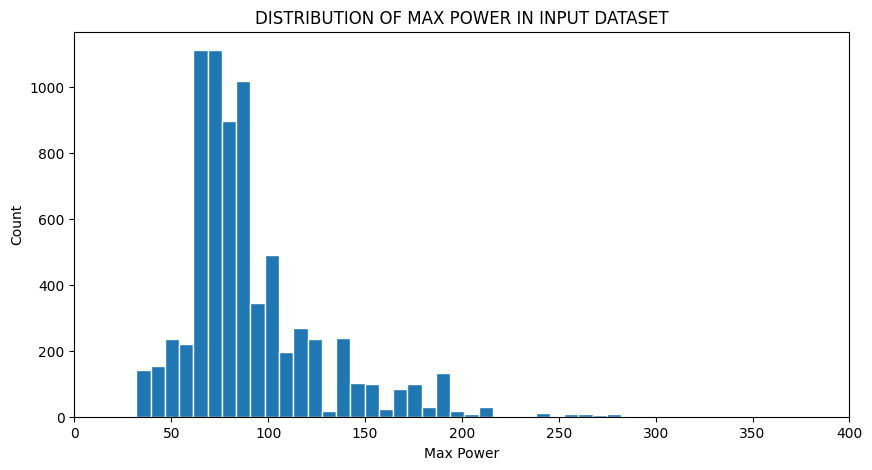

In [25]:
plt.figure(figsize=(10, 5))
bin_number = 50
plt.hist(df.max_power, bins=bin_number, edgecolor="white")
plt.xlabel("Max Power")
plt.xlim(0, max(df.max_power))
plt.ylabel("Count")
plt.title("DISTRIBUTION OF MAX POWER IN INPUT DATASET")
plt.show()

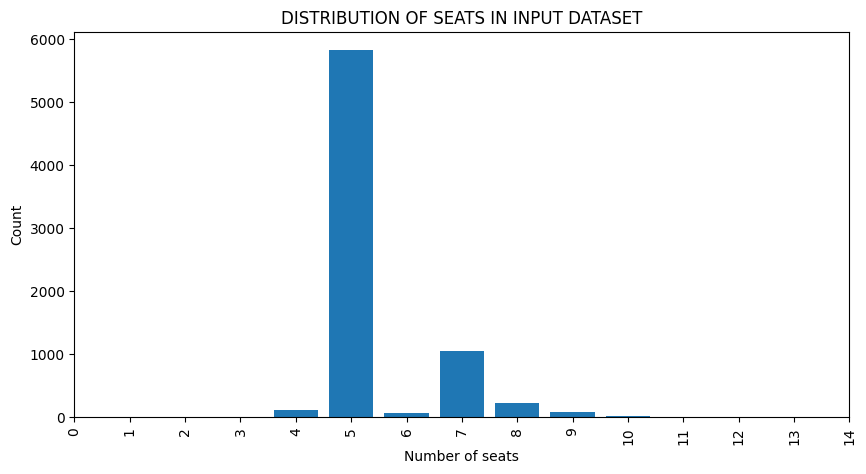

In [26]:
values = []
levels = df['seats'].unique()
for level in levels:
    values.append(df['seats'].loc[df['seats'] == level].count())
fig, ax = plt.subplots(figsize=(10, 5))
plt.bar(levels, values)
plt.xticks(rotation=90)
plt.xlabel("Number of seats")
plt.ylabel("Count")
plt.xlim(0, max(levels))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.title("DISTRIBUTION OF SEATS IN INPUT DATASET")
plt.show()

In [27]:
fuel_type = df.fuel_type.value_counts()
fuel_type

Diesel    4005
Petrol    3257
CNG         48
LPG         33
Name: fuel_type, dtype: int64

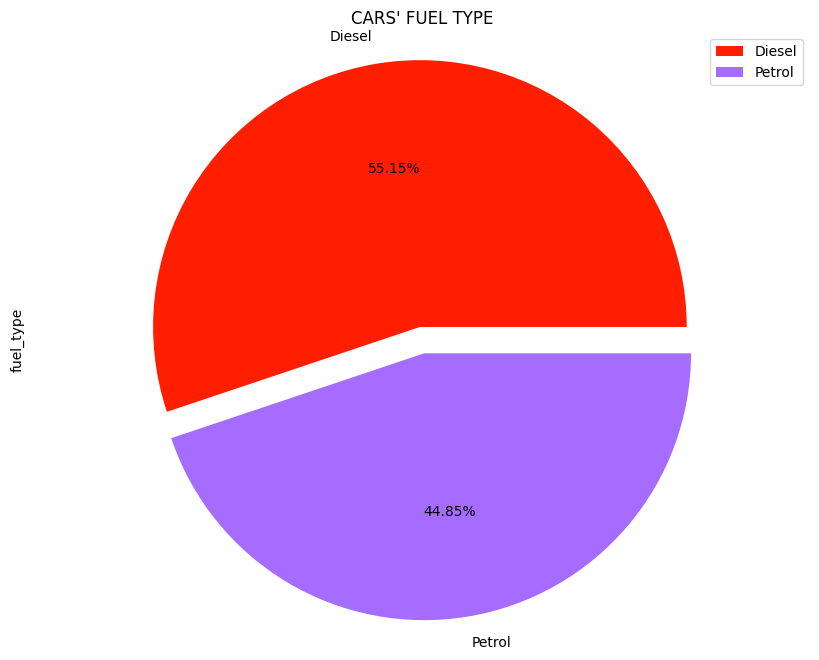

In [28]:
plt.figure(figsize=(10, 8), )
explode = (0.1, 0)
colors = ['#FF1E00', '#A66CFF', '#EAE509', '#D61C4E', '#3CCF4E']

fuel_type[:2].plot(kind='pie',
                        colors=colors,
                        explode=explode,
                        autopct='%1.2f%%')
plt.axis('equal')
plt.legend(labels=fuel_type[:2].index, loc="best")
plt.title("CARS' FUEL TYPE")
plt.show()

In [29]:
owner = df.owner.value_counts()
owner

First Owner             4842
Second Owner            1874
Third Owner              479
Fourth & Above Owner     143
Test Drive Car             5
Name: owner, dtype: int64

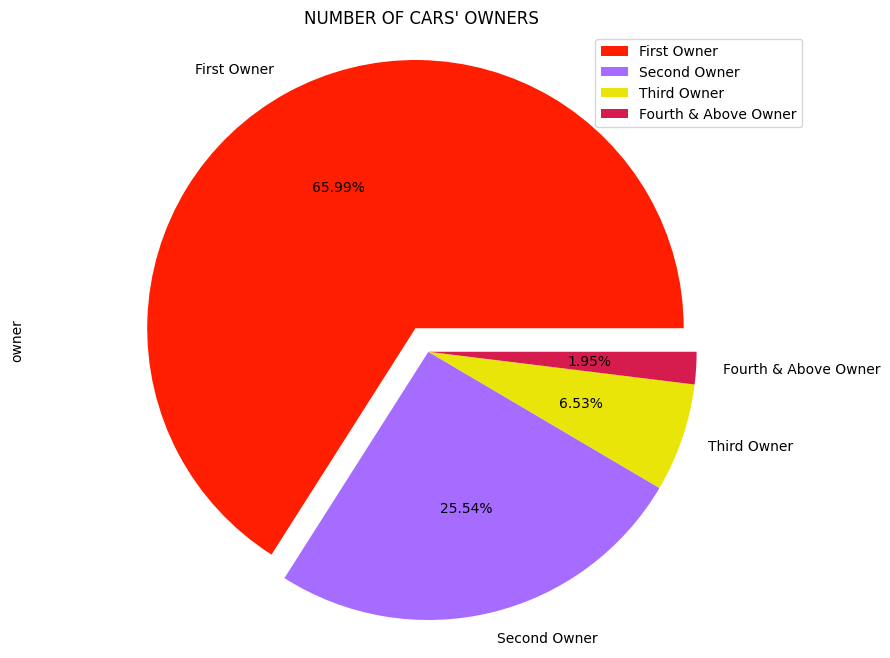

In [30]:
plt.figure(figsize=(10, 8), )
explode = (0.1, 0, 0, 0)
colors = ['#FF1E00', '#A66CFF', '#EAE509', '#D61C4E', '#3CCF4E']

owner[:4].plot(kind='pie',
                        colors=colors,
                        explode=explode,
                        autopct='%1.2f%%')
plt.axis('equal')
plt.legend(labels=owner[:4].index, loc="best")
plt.title("NUMBER OF CARS' OWNERS")
plt.show()

In [31]:
transmission = df.transmission.value_counts()
transmission

Manual       6374
Automatic     969
Name: transmission, dtype: int64

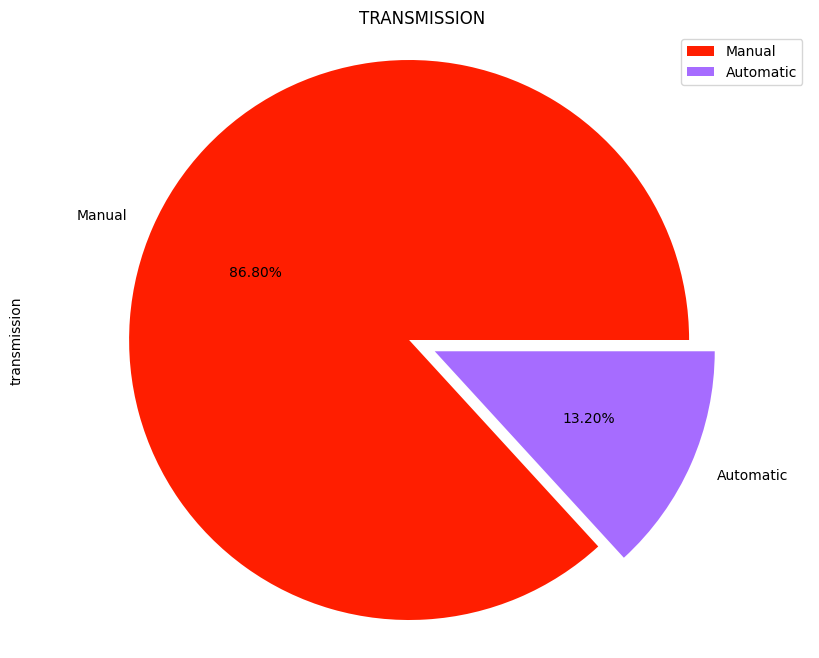

In [32]:
plt.figure(figsize=(10, 8), )
explode = (0.1, 0)
colors = ['#FF1E00', '#A66CFF', '#EAE509', '#D61C4E', '#3CCF4E']

transmission.plot(kind='pie',
                        colors=colors,
                        explode=explode,
                        autopct='%1.2f%%')
plt.axis('equal')
plt.legend(labels=transmission.index, loc="best")
plt.title("TRANSMISSION")
plt.show()

In [33]:
seller_type = df.seller_type.value_counts()
seller_type

Individual          6100
Dealer              1027
Trustmark Dealer     216
Name: seller_type, dtype: int64

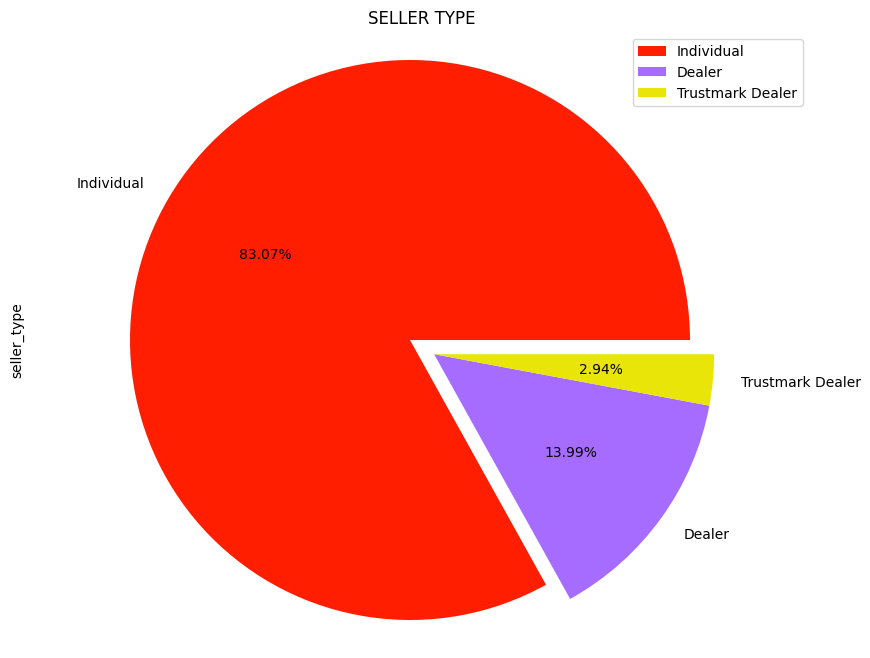

In [34]:
plt.figure(figsize=(10, 8), )
explode = (0.1, 0, 0)
colors = ['#FF1E00', '#A66CFF', '#EAE509', '#D61C4E', '#3CCF4E']

seller_type.plot(kind='pie',
                        colors=colors,
                        explode=explode,
                        autopct='%1.2f%%')
plt.axis('equal')
plt.legend(labels=seller_type.index, loc="best")
plt.title("SELLER TYPE")
plt.show()

[5642, 605, 127]
[458, 422, 89]


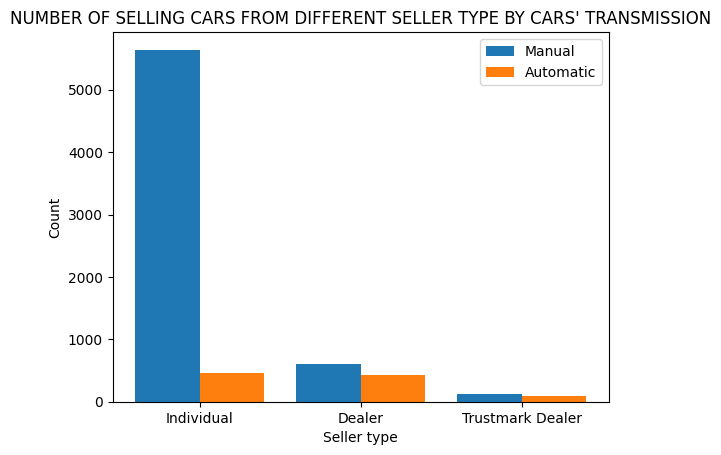

In [35]:
levels = df.seller_type.unique()
values_1 = []
values_2 = []
for level in levels:
    values_1.append(df['seller_type'].loc[df.transmission == 'Manual'].loc[df['seller_type'] == level].count())
    values_2.append(df['seller_type'].loc[df.transmission == 'Automatic'].loc[df['seller_type'] == level].count())
X_axis = np.arange(len(levels))

plt.bar(X_axis - 0.2, values_1, label='Manual', width=0.4)
plt.bar(X_axis + 0.2, values_2, label='Automatic', width=0.4)
print(values_1)
print(values_2)
plt.xticks(X_axis, levels)
plt.xlabel("Seller type")
plt.ylabel("Count")
plt.title("NUMBER OF SELLING CARS FROM DIFFERENT SELLER TYPE BY CARS' TRANSMISSION")
plt.legend()
plt.show()

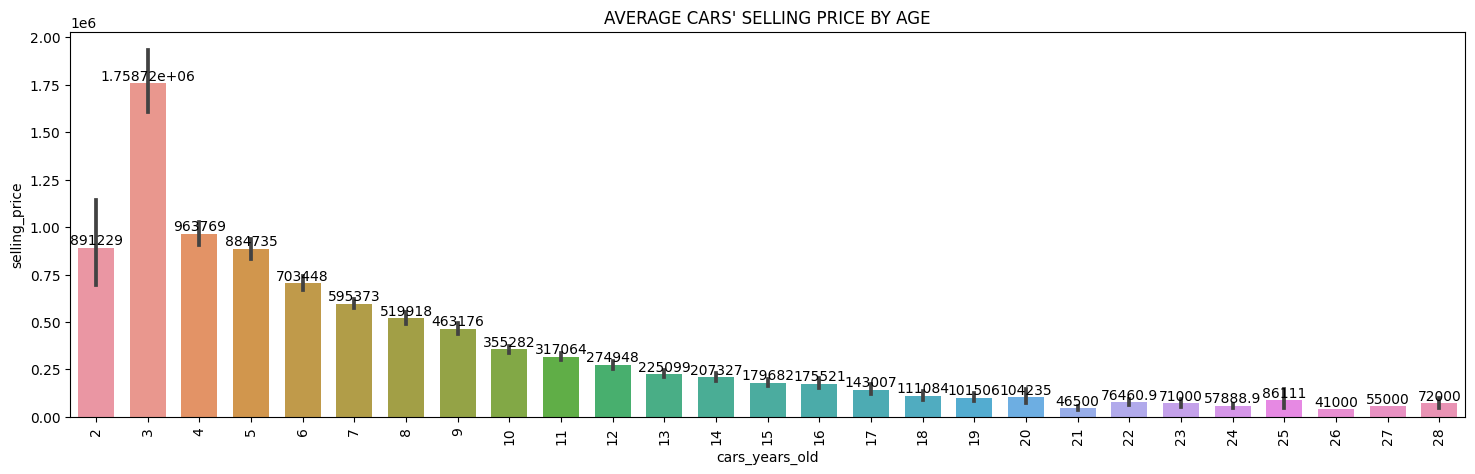

In [36]:
plt.figure(figsize=(18, 5))

ax = sns.barplot(x="cars_years_old", y="selling_price", data=df, width=0.7)
plt.xticks(rotation=90)
plt.title("AVERAGE CARS' SELLING PRICE BY AGE")

for i in ax.containers:  #to set a label on top of the bars.
    ax.bar_label(i, )

Text(0.5, 1.0, 'AVERAGE SELLING PRICE BY DRIVEN DISTANCE')

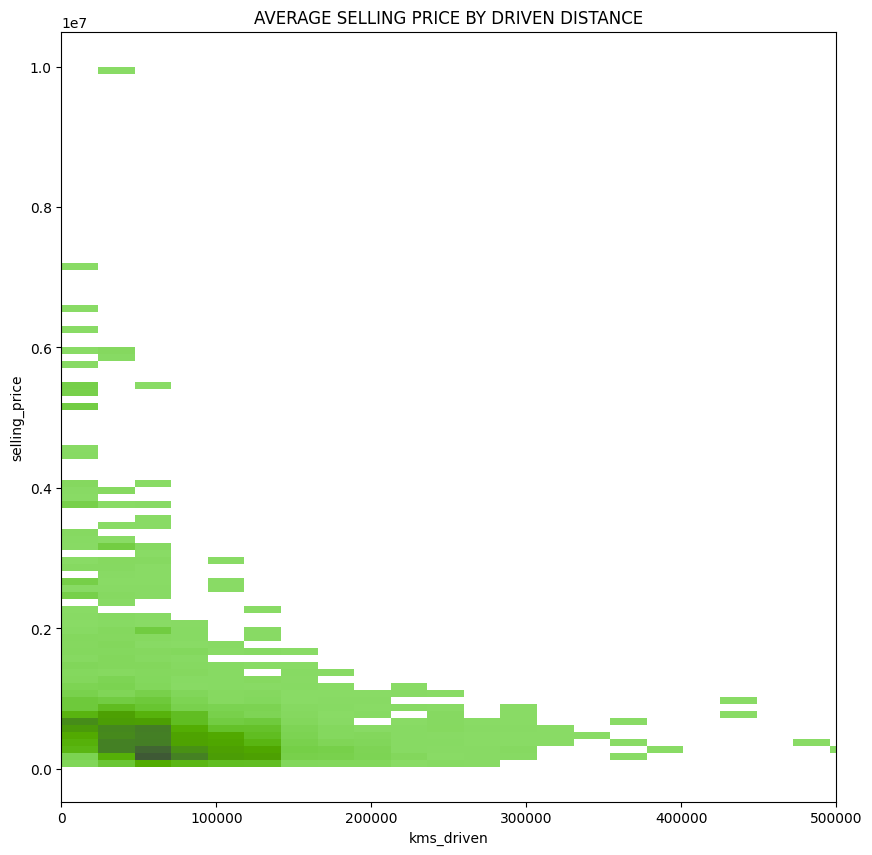

In [37]:
plt.figure(figsize=(10, 10))

ax = sns.histplot(x="kms_driven", y="selling_price", data=df, bins=100, color="lawngreen")
plt.xlim(0, 500000)
plt.title("AVERAGE SELLING PRICE BY DRIVEN DISTANCE")

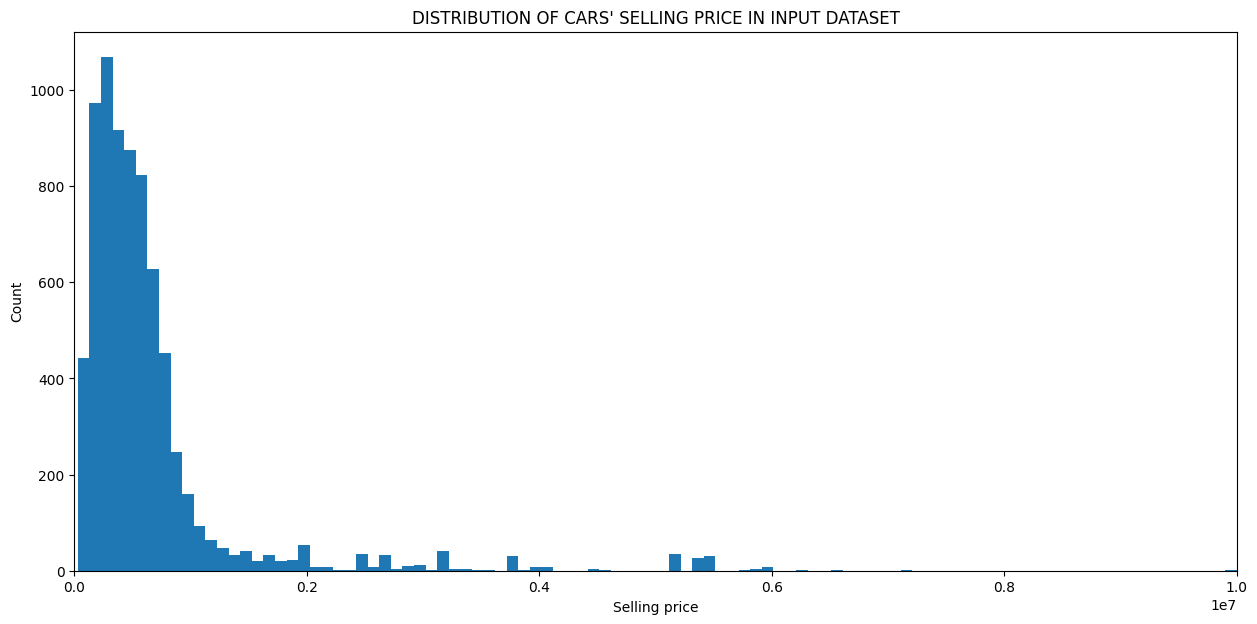

In [38]:
plt.figure(figsize=(15,7))
plt.hist(df.selling_price, bins = 100)
plt.title("DISTRIBUTION OF CARS' SELLING PRICE IN INPUT DATASET")
plt.xlabel("Selling price")
plt.ylabel("Count")
plt.xlim(0, max(df.selling_price))
plt.show()

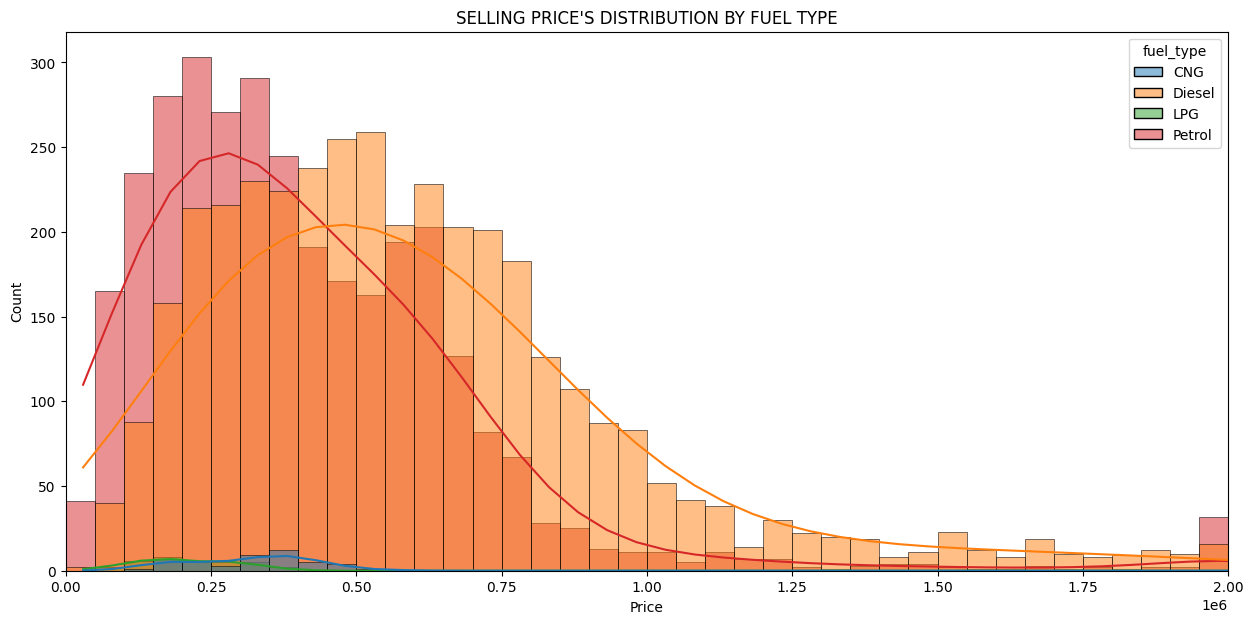

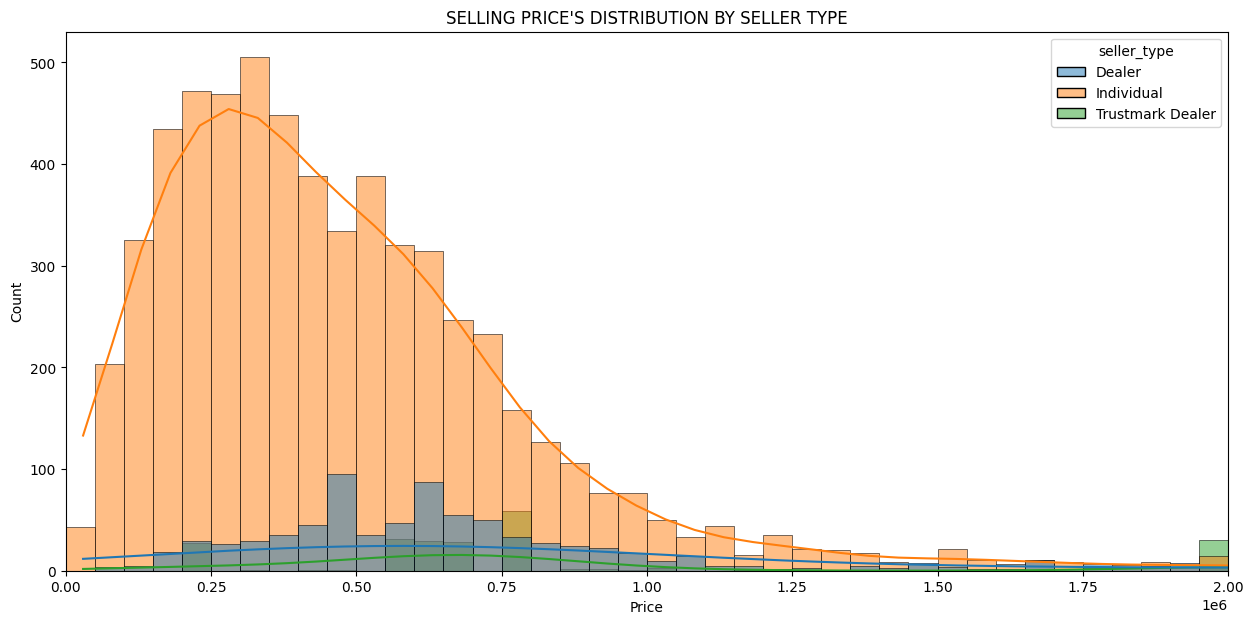

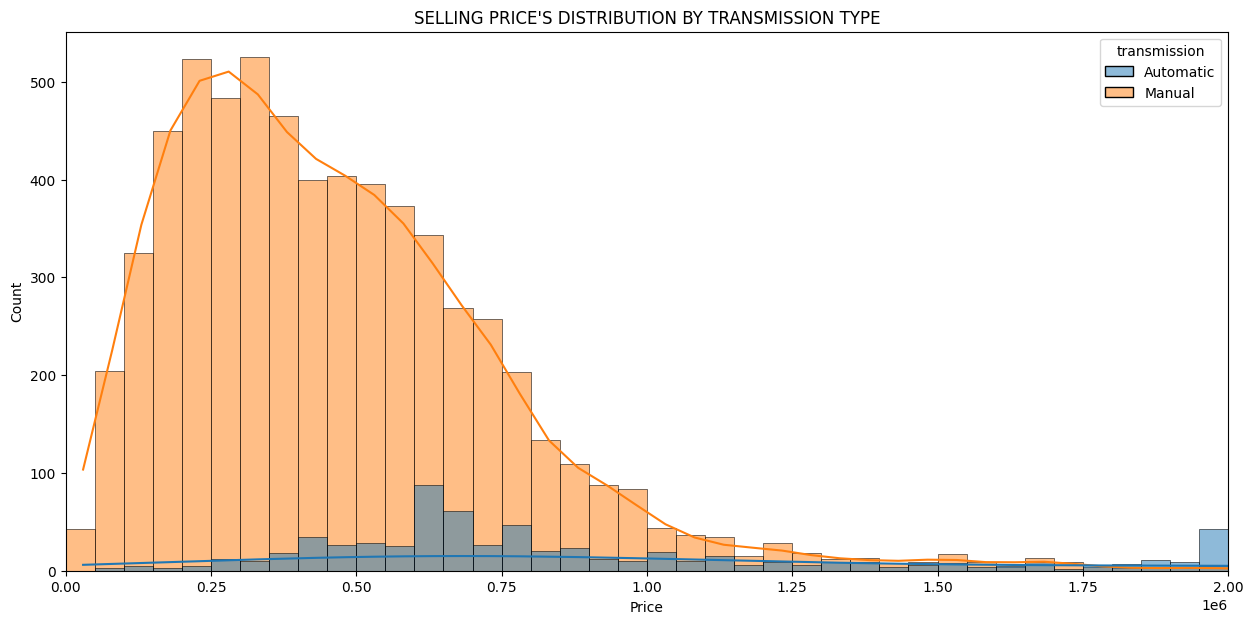

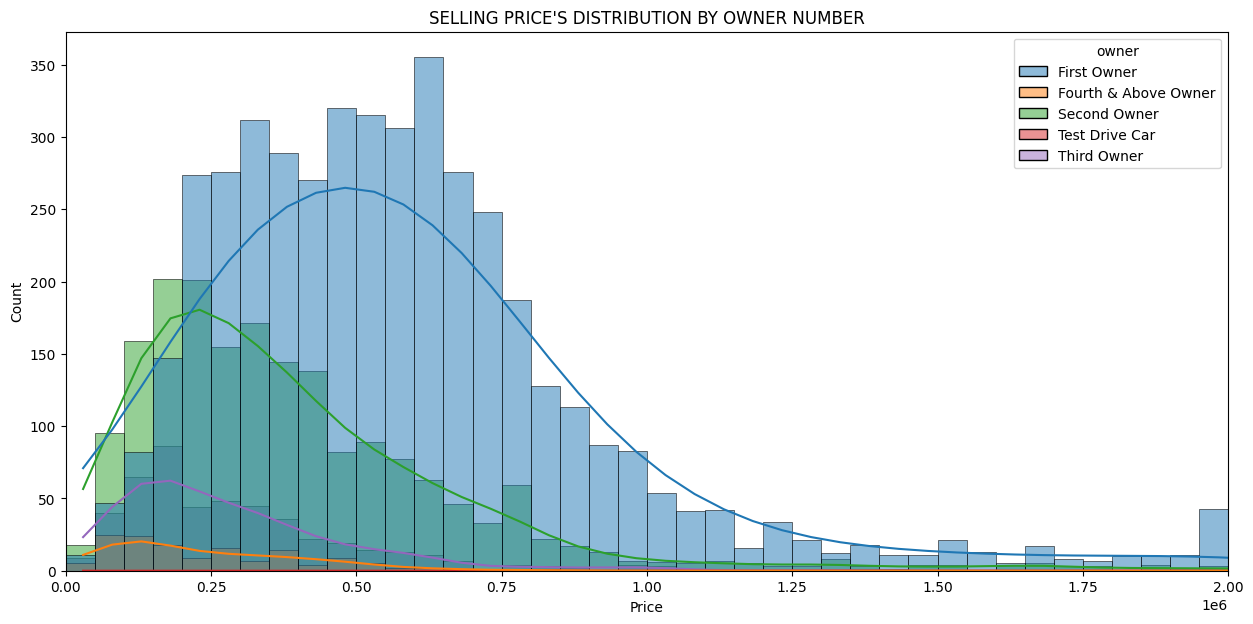

In [39]:
plt.figure(figsize=(15, 7))
sns.histplot(x='selling_price', data=df, kde=True, hue='fuel_type', bins=40, binrange=(0, 2000000))
plt.xlim(0, 2000000)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("SELLING PRICE'S DISTRIBUTION BY FUEL TYPE")
plt.show()

plt.figure(figsize=(15, 7))
sns.histplot(x='selling_price', data=df, kde=True, hue='seller_type', bins=40, binrange=(0, 2000000))
plt.xlim(0, 2000000)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("SELLING PRICE'S DISTRIBUTION BY SELLER TYPE")
plt.show()

plt.figure(figsize=(15, 7))
sns.histplot(x='selling_price', data=df, kde=True, hue='transmission', bins=40, binrange=(0, 2000000))
plt.xlim(0, 2000000)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("SELLING PRICE'S DISTRIBUTION BY TRANSMISSION TYPE")
plt.show()

plt.figure(figsize=(15, 7))
sns.histplot(x='selling_price', data=df, kde=True, hue='owner', bins=40, binrange=(0, 2000000))
plt.xlim(0, 2000000)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("SELLING PRICE'S DISTRIBUTION BY OWNER NUMBER")
plt.show()

Text(0.5, 1.0, 'AVERAGE SELLING PRICE BY MILEAGE')

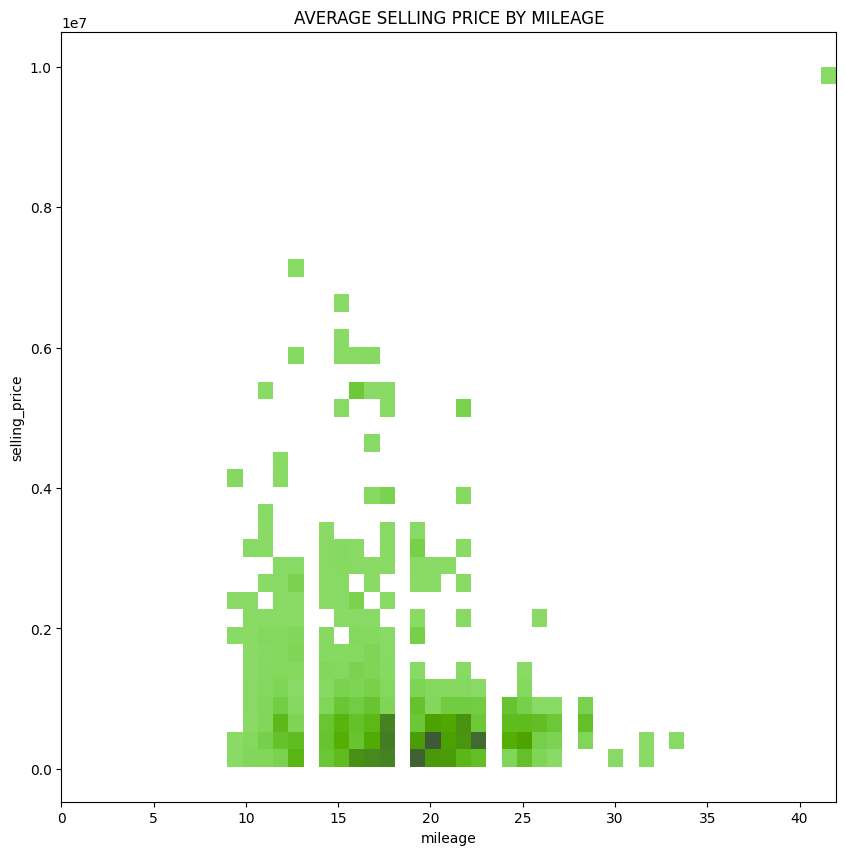

In [52]:
plt.figure(figsize=(10, 10))

ax = sns.histplot(x="mileage", y="selling_price", data=df, bins=40, color="lawngreen")
plt.xlim(0, max(df['mileage']))
plt.title("AVERAGE SELLING PRICE BY MILEAGE")

Text(0.5, 1.0, 'AVERAGE SELLING PRICE BY ENGINE')

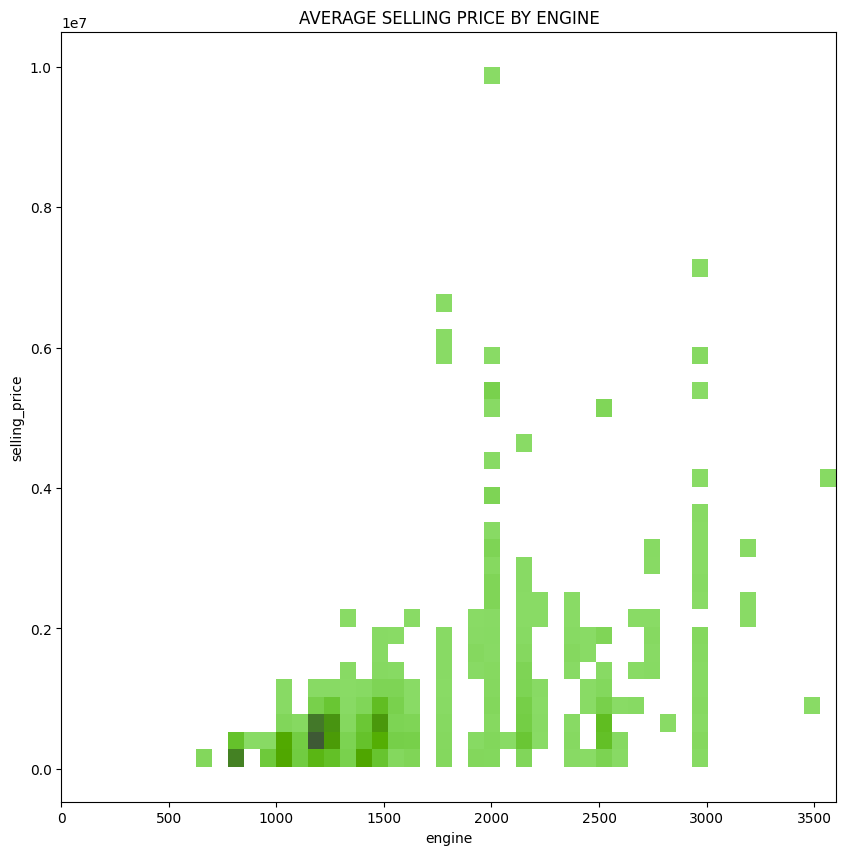

In [53]:
plt.figure(figsize=(10, 10))

ax = sns.histplot(x="engine", y="selling_price", data=df, bins=40, color="lawngreen")
plt.xlim(0, max(df['engine']))
plt.title("AVERAGE SELLING PRICE BY ENGINE")

Text(0.5, 1.0, 'AVERAGE SELLING PRICE BY TORQUE')

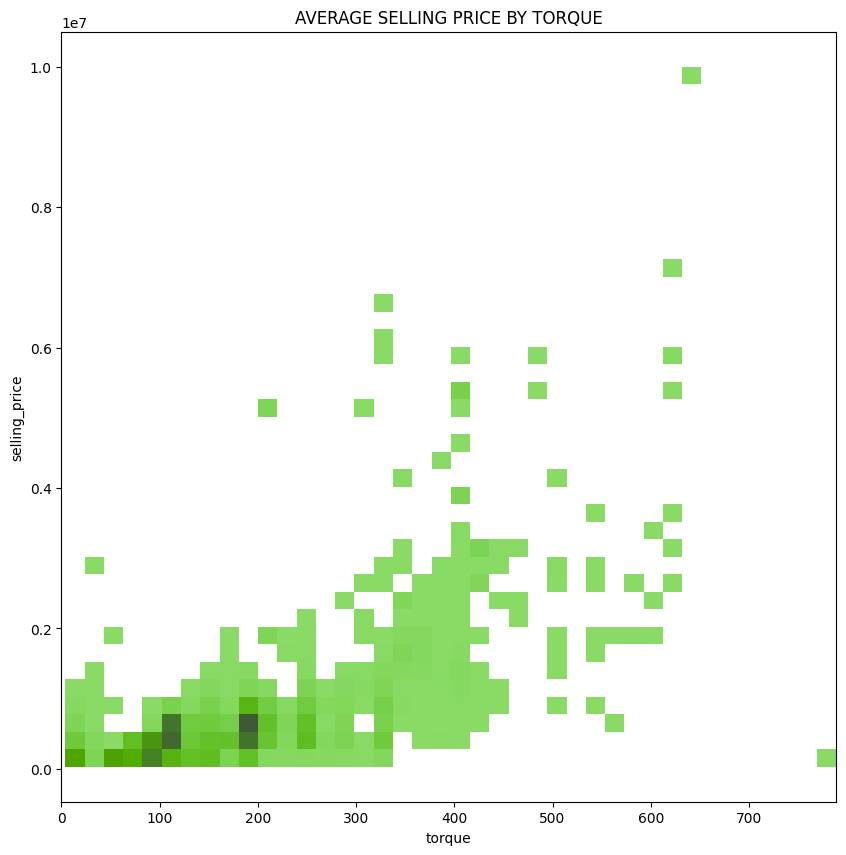

In [54]:
plt.figure(figsize=(10, 10))

ax = sns.histplot(x="torque", y="selling_price", data=df, bins=40, color="lawngreen")
plt.xlim(0, max(df['torque']))
plt.title("AVERAGE SELLING PRICE BY TORQUE")

Text(0.5, 1.0, 'AVERAGE SELLING PRICE BY MAX POWER')

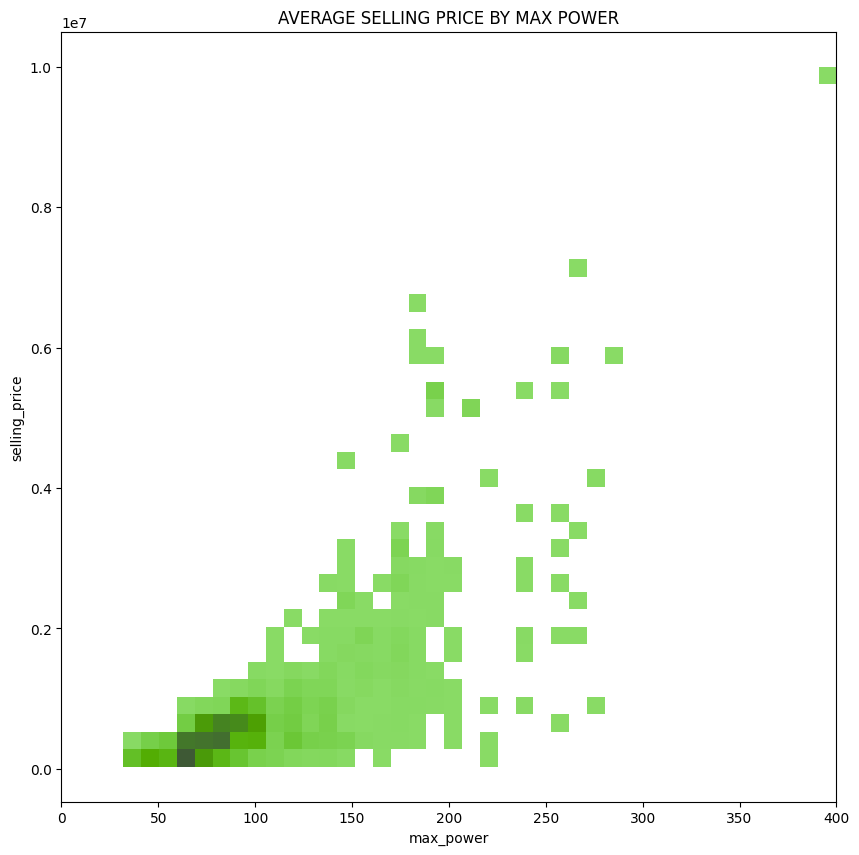

In [55]:
plt.figure(figsize=(10, 10))

ax = sns.histplot(x="max_power", y="selling_price", data=df, bins=40, color="lawngreen")
plt.xlim(0, max(df['max_power']))
plt.title("AVERAGE SELLING PRICE BY MAX POWER")